<a href="https://colab.research.google.com/github/Konoko2004/Sales_Data_Analysis/blob/main/Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

raw_data = pd.read_csv(r'https://raw.githubusercontent.com/Konoko2004/Sales_Data_Analysis/main/sales_data.csv')
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data[raw_data['Date']=='2016-07-31']
raw_data['Date']
raw_data[raw_data.isnull()==True]

raw_data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [2]:
#Check null values in dataframe
null_table = raw_data.isnull()

for column in null_table.columns.values.tolist():
    print(column)
    print (null_table[column].value_counts())
    print("")

Date
False    113036
Name: Date, dtype: int64

Day
False    113036
Name: Day, dtype: int64

Month
False    113036
Name: Month, dtype: int64

Year
False    113036
Name: Year, dtype: int64

Customer_Age
False    113036
Name: Customer_Age, dtype: int64

Age_Group
False    113036
Name: Age_Group, dtype: int64

Customer_Gender
False    113036
Name: Customer_Gender, dtype: int64

Country
False    113036
Name: Country, dtype: int64

State
False    113036
Name: State, dtype: int64

Product_Category
False    113036
Name: Product_Category, dtype: int64

Sub_Category
False    113036
Name: Sub_Category, dtype: int64

Product
False    113036
Name: Product, dtype: int64

Order_Quantity
False    113036
Name: Order_Quantity, dtype: int64

Unit_Cost
False    113036
Name: Unit_Cost, dtype: int64

Unit_Price
False    113036
Name: Unit_Price, dtype: int64

Profit
False    113036
Name: Profit, dtype: int64

Cost
False    113036
Name: Cost, dtype: int64

Revenue
False    113036
Name: Revenue, dtype: int64



In [3]:
raw_data['Profit per unit'] = raw_data['Profit']/raw_data['Order_Quantity']
raw_data['Profit per unit'].dtype

dtype('float64')

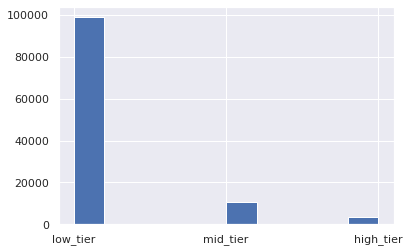

In [24]:
# bin profit categories 

raw_data['Profit per unit'] = raw_data['Profit']/raw_data['Order_Quantity']
bins = np.linspace(min(raw_data['Profit per unit']), max(raw_data['Profit per unit']),4)
bins.dtype

#split into 3 categories : low tier, mid tier, high tier

bin_groups = ['low_tier','mid_tier','high_tier']
raw_data['Profit per unit binned'] = pd.cut(raw_data['Profit per unit'], bins, labels = bin_groups, include_lowest = True)
raw_data['Profit per unit binned'].hist()

In [22]:
sns.

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit per unit,Profit per unit binned
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,73.750000,low_tier
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,73.750000,low_tier
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,59.391304,low_tier
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,59.400000,low_tier
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,59.500000,low_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,37.333333,low_tier
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,29.772727,low_tier
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,29.772727,low_tier
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,28.500000,low_tier


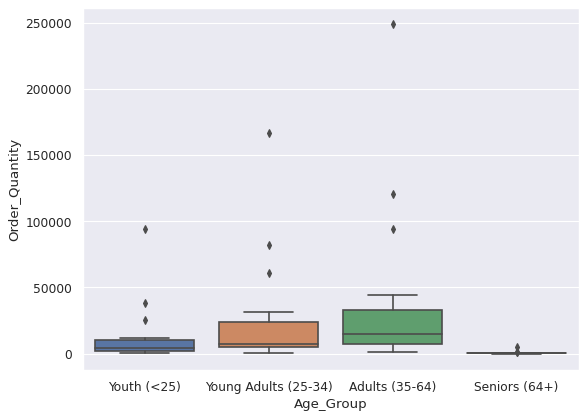

In [34]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

grp_data = raw_data.groupby(['Sub_Category','Age_Group'], as_index = False)['Order_Quantity'].sum()
sns.boxplot(x = 'Age_Group',y = 'Order_Quantity',data = grp_data,order = ['Youth (<25)','Young Adults (25-34)','Adults (35-64)','Seniors (64+)'])

# pivot table
# grp_pvt = grp_data.pivot(index = 'Sub_Category',columns = 'Age_Group')
# grp_pvt

In [ ]:
# Covert Age Group categories into numeric variables

pd.get_dummies(raw_data['Age_Group'])

,Adults (35-64),Seniors (64+),Young Adults (25-34),Youth (<25)
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
113031,1,0,0,0
113032,0,0,0,1
113033,0,0,0,1
113034,1,0,0,0


In [ ]:
#Normalize Data for Statistics
#3 methods to use for data normalization - Simple Scaling, Min-max, z-score

raw_data.head(5)

#1 : normalize using Simple Scaling --- datapoint / max

raw_data['Simple Scaling normalize Order_Quantity'] = raw_data['Order_Quantity']/raw_data['Order_Quantity'].max()
raw_data['Simple Scaling normalize Unit_Cost'] = raw_data['Unit_Cost']/raw_data['Unit_Cost'].max()
raw_data['Simple Scaling normalize Unit_Price'] = raw_data['Unit_Price']/raw_data['Unit_Price'].max()
raw_data['Simple Scaling normalize Profit'] = raw_data['Profit']/raw_data['Profit'].max()
raw_data['Simple Scaling normalize Cost'] = raw_data['Cost']/raw_data['Cost'].max()
raw_data['Simple Scaling normalize Revenue'] = raw_data['Revenue']/raw_data['Revenue'].max()

raw_data.head(5)

#2 : normalize using min-max method --- (datapoint - mean) / (max - min)

raw_data['min-max normalize Order_Quantity'] = (raw_data['Order_Quantity']-raw_data['Order_Quantity'].min())/(raw_data['Order_Quantity'].max()-raw_data['Order_Quantity'].min())
raw_data['min-max normalize Unit_Cost'] = (raw_data['Unit_Cost']-raw_data['Unit_Cost'].min())/(raw_data['Unit_Cost'].max()-raw_data['Unit_Cost'].min())
raw_data['min-max normalize Unit_Price'] = (raw_data['Unit_Price']-raw_data['Unit_Price'].min())/(raw_data['Unit_Price'].max()-raw_data['Unit_Price'].min())
raw_data['min-max normalize Profit'] = (raw_data['Profit']-raw_data['Profit'].min())/(raw_data['Profit'].max()-raw_data['Profit'].min())
raw_data['min-max normalize Cost'] = (raw_data['Cost']-raw_data['Cost'].min())/(raw_data['Cost'].max()-raw_data['Cost'].min())
raw_data['min-max normalize Revenue'] = (raw_data['Revenue']-raw_data['Revenue'].min())/(raw_data['Revenue'].max()-raw_data['Revenue'].min())

#3 : normalize using z-score method (also known as standardization)--- (datapoint - mean) / standard deviation 

raw_data['z-score normalize Order_Quantity'] = (raw_data['Order_Quantity'] - raw_data['Order_Quantity'].mean()) / raw_data['Order_Quantity'].std()
raw_data['z-score normalize Unit_Cost'] = (raw_data['Unit_Cost'] - raw_data['Unit_Cost'].mean()) / raw_data['Unit_Cost'].std()
raw_data['z-score normalize Unit_Price'] = (raw_data['Unit_Price'] - raw_data['Unit_Price'].mean()) / raw_data['Unit_Price'].std()
raw_data['z-score normalize Profit'] = (raw_data['Profit'] - raw_data['Profit'].mean()) / raw_data['Profit'].std()
raw_data['z-score normalize Cost'] = (raw_data['Cost'] - raw_data['Cost'].mean()) / raw_data['Cost'].std()
raw_data['z-score normalize Revenue'] = (raw_data['Revenue'] - raw_data['Revenue'].mean()) / raw_data['Revenue'].std()

raw_data.head(5)


#Suggestion : Use Simple Scaling for simplicity sake.


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Simple Scaling normalize Order_Quantity,Simple Scaling normalize Unit_Cost,Simple Scaling normalize Unit_Price,Simple Scaling normalize Profit,Simple Scaling normalize Cost,Simple Scaling normalize Revenue,min-max normalize Order_Quantity,min-max normalize Unit_Cost,min-max normalize Unit_Price,min-max normalize Profit,min-max normalize Cost,min-max normalize Revenue,z-score normalize Order_Quantity,z-score normalize Unit_Cost,z-score normalize Unit_Price,z-score normalize Profit,z-score normalize Cost,z-score normalize Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,0.25000,0.020728,0.033538,0.039083,0.008376,0.016358,0.225806,0.020276,0.032998,0.040989,0.008353,0.016325,-0.408044,-0.404296,-0.361077,0.671859,-0.123543,0.149439
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,0.25000,0.020728,0.033538,0.039083,0.008376,0.016358,0.225806,0.020276,0.032998,0.040989,0.008353,0.016325,-0.408044,-0.404296,-0.361077,0.671859,-0.123543,0.149439
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,0.71875,0.020728,0.033538,0.090488,0.024082,0.041344,0.709677,0.020276,0.032998,0.092291,0.024059,0.041311,1.160689,-0.404296,-0.361077,2.381534,0.639285,1.257838
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,0.62500,0.020728,0.033538,0.078696,0.020941,0.035954,0.612903,0.020276,0.032998,0.080524,0.020918,0.035921,0.846942,-0.404296,-0.361077,1.989366,0.486719,1.018742
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,0.12500,0.020728,0.033538,0.015766,0.004188,0.007198,0.096774,0.020276,0.032998,0.017718,0.004165,0.007164,-0.826373,-0.404296,-0.361077,-0.103664,-0.326963,-0.256949


In [ ]:


d = raw_data[raw_data['Customer_Gender']=='M'].groupby(['Date']).agg({'Profit':['min','max','first','last']})
raw_data['Date'] = pd.to_datetime(raw_data['Date'])

raw_data[(raw_data['Date'].dt.month == 5) & (raw_data['Date'].dt.year == 2013)].max()



#### if we are finding month 7 2016 last trading date, your put_df_here should only contain the data for that month and year.
#### Also filter your put_df_here to exclude any Null values in price.
#### eg : dataframe should only contain 1 July 2016 to 31 July 2016 containing prices.

#Your DF should look like this below :

#### Ticker_Name | Date        | Price
#### xyz         | 1 Jul 2016  | 26.00
#### ...         | ...         | ...
#### xyz         | 31 Jul 2016 | 28.00





def last_transaction_of_the_month(put_df_here,put_ticker_here):
  
  ticker = put_ticker_here
  df = put_df_here[put_df_here['Ticker_Name']==ticker]
  last_trans_date = df['Date'].max()
  Last_trading_price = df[(df['Date']==last_trans_date) & (df['Ticker_Name']==ticker)]['Price']
  return Last_trading_price

In [ ]:

#Top 10 best sellers global

raw_data[['Product','Order_Quantity','Profit']].groupby(['Product']).sum().sort_values('Order_Quantity',ascending = False).head(10)

#Top 10 most profitable products global

raw_data[['Product','Order_Quantity','Profit']].groupby(['Product']).sum().sort_values('Profit',ascending = False).head(10)

,Order_Quantity,Profit
Product,,
"Mountain-200 Black, 38",1642,1310464
"Road-150 Red, 62",1191,1243755
"Mountain-200 Silver, 42",1461,1231452
"Sport-100 Helmet, Red",63663,1191402
"Mountain-200 Silver, 38",1477,1165560
"Sport-100 Helmet, Black",62105,1141330
"Mountain-200 Black, 46",1349,1080672
"Road-150 Red, 52",980,1053260
"Sport-100 Helmet, Blue",55895,1048446
